In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler


In [7]:
data={
    'user_id' : [1, 1, 2, 2, 3, 3, 4, 4],
    'feature_id': [101, 102, 101, 103, 102,103, 101, 104],
    'interaction':[5,3,4,2,3,5,4,2]
    
}

df = pd.DataFrame(data)

In [8]:
print("sample Data:\n", df)

sample Data:
    user_id  feature_id  interaction
0        1         101            5
1        1         102            3
2        2         101            4
3        2         103            2
4        3         102            3
5        3         103            5
6        4         101            4
7        4         104            2


In [9]:
user_feature_matrix = df.pivot_table(index= 'user_id', columns='feature_id',values = 'interaction', fill_value = 0 )
print("\nUser  Similarty matrix:n", user_feature_matrix)


User  Similarty matrix:n feature_id  101  102  103  104
user_id                       
1             5    3    0    0
2             4    0    2    0
3             0    3    5    0
4             4    0    0    2


In [14]:
similarity_matrix = cosine_similarity(user_feature_matrix)
print("\nUser similarty Matrix:\n", similarity_matrix)


User similarty Matrix:
 [[1.         0.76696499 0.26470588 0.76696499]
 [0.76696499 1.         0.38348249 0.8       ]
 [0.26470588 0.38348249 1.         0.        ]
 [0.76696499 0.8        0.         1.        ]]


In [23]:
scaler = MinMaxScaler()
normalized_matrix= scaler.fit_transform(user_feature_matrix)

In [24]:
user_index = 0
similarity_scores = similarity_matrix[user_index]

In [25]:
recommendation_scores = np.dot(similarity_scores, normalized_matrix)
recommendation_df= pd.DataFrame({
    'feature_id':  user_feature_matrix.columns,
    'score': recommendation_scores
}).sort_values(by = 'score', ascending = False)

In [27]:
print("\nRecommended Features for User 1:\n", recommendation_df)


Recommended Features for User 1:
    feature_id     score
0         101  2.227144
1         102  1.264706
3         104  0.766965
2         103  0.571492


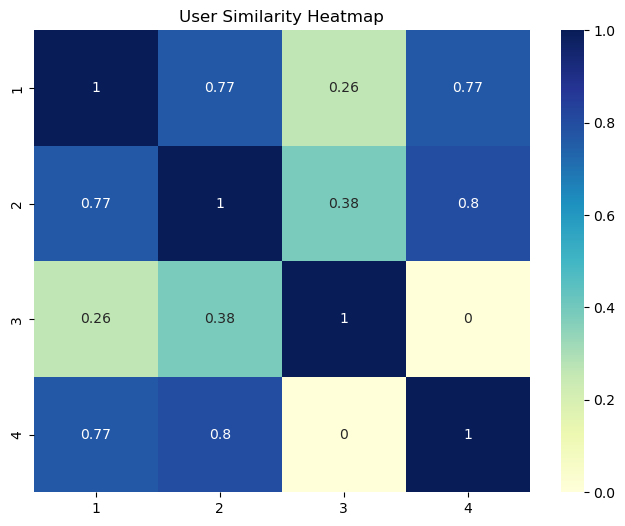

In [29]:
try:
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 6))
    sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=user_feature_matrix.index, yticklabels=user_feature_matrix.index)
    plt.title("User Similarity Heatmap")
    plt.show()
except ImportError:
    print("\nInstall matplotlib and seaborn for visualization.")

